In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["font.size"] = 12

/var/folders/mm/6bddrf0x3d526w0f7d9wvctw0000gn/T/ipykernel_40009/2520610969.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [51]:
# read rhea to mol data
data_rhea_mol = pd.read_csv("rhea_molecules.tsv", sep="\t")
data_uniprot_rhea = pd.read_csv("uniprot_rhea.tsv", sep="\t")
removed_molecules = np.loadtxt("removed_molecules.txt", dtype=str)

In [19]:
mol_substrate_full_collection = []
mol_product_full_collection = []

for i in range(data_rhea_mol.shape[0]):
    mol_substrate_full_collection += data_rhea_mol["substrate"][i].split(".")
    mol_product_full_collection += data_rhea_mol["product"][i].split(".")

mol_substrate_full_collection = np.array(mol_substrate_full_collection, dtype=str)
mol_product_full_collection = np.array(mol_product_full_collection, dtype=str)

mol_full_collection = np.hstack([mol_substrate_full_collection, mol_product_full_collection])
mol_unique_collection = np.unique(mol_full_collection)
mol_unique_count = np.zeros(mol_unique_collection.shape[0], dtype=int)
for i in range(mol_unique_collection.shape[0]):
    mol_unique_count[i] = np.sum(mol_full_collection == mol_unique_collection[i])


In [23]:
mol_unique_count_rank = np.argsort(mol_unique_count)[::-1]
mol_unique_collection[mol_unique_count_rank]

array(['[H+]', '[H]O[H]', 'O=O', ...,
       'CCCCC[C@H](O)/C=C/[C@@H]1[C@@H](C/C=C\\CCCC(=O)NCCO)[C@@H](O)C[C@H]1O',
       'CCCCC[C@H](O)/C=C/[C@@H]1[C@@H](C/C=C\\CCCC(=O)NCCO)[C@@H]2C[C@H]1OO2',
       'CC[C@@H](C)[NH3+]'], dtype='<U1638')

(-1.0, 30.0)

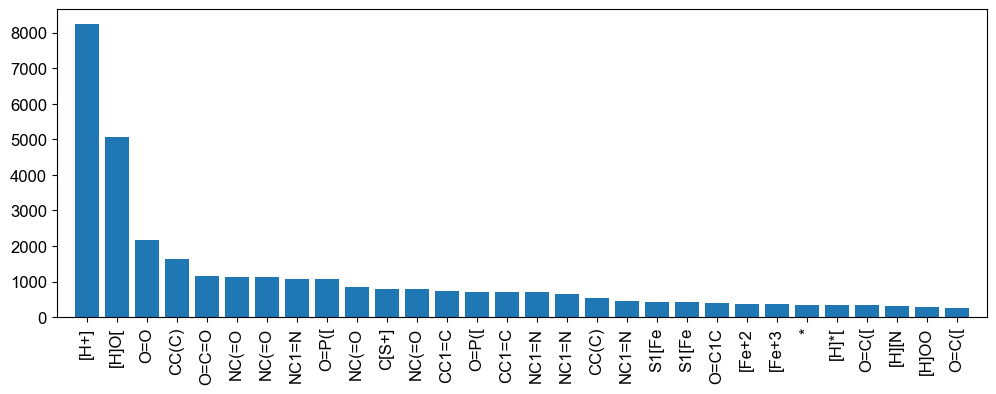

In [48]:
present_items = 30

plt.figure(figsize=(12,4))

plt.bar(x=np.arange(present_items),height=mol_unique_count[mol_unique_count_rank][:present_items])
plt.xticks(np.arange(present_items), ["%.5s"%mol for mol in mol_unique_collection[mol_unique_count_rank][:present_items]],rotation=90)

plt.xlim(-1,present_items)

In [42]:
f = open("molecules.txt", "w")
for mol in mol_unique_collection.tolist():
    if len(mol) <= 10:
        f.write(mol)
        f.write("\n")
f.close()

In [ ]:
mol_unique_collection.tolist

In [53]:
data_uniprot_rhea

,Entry,EC number,Rhea ID,Date of creation,Sequence
0,A0A009IHW8,3.2.2.-;3.2.2.6,RHEA:75299;RHEA:16301;RHEA:19849,20200226,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
1,A0A024B7W1,2.1.1.56;2.1.1.57;2.7.7.48;3.4.21.91;3.6.1.15;...,RHEA:67008;RHEA:67020;RHEA:21248;RHEA:23680;RH...,20180131,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...
2,A0A059TC02,1.2.1.44,RHEA:64648;RHEA:64652;RHEA:64656;RHEA:10620,20201202,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...
3,A0A061AE05,2.7.1.25;2.7.7.4,RHEA:18133;RHEA:24152,20230222,MLTPRDENNEGDAMPMLKKPRYSSLSGQSTNITYQEHTISREERAA...
4,A0A061I403,2.7.7.108;3.1.4.-,RHEA:54288;RHEA:55932;RHEA:54292,20180228,MPMASVIAVAEPKWISVWGRFLWLTLLSMALGSLLALLLPLGAVEE...
...,...,...,...,...,...
225378,Q6L032,3.5.4.2,RHEA:23688,20040816,MLLKNIKISNDYNIFMIIASRKPSLKDIYKIIKVSKFDEPADLIIE...
225379,Q7TDB6,2.7.7.48,RHEA:21248,20110111,MSLTSRYTHFVPDSTITEILNDSNTPQILLHYANIVNGSTPVHFTS...
225380,Q85055,2.7.7.48,RHEA:21248,20110111,MSTLLIPQDTIAHTFDEAVASESNLRIDEVPENYLERFIHPSEPEN...
225381,Q94MV8,3.6.1.12,RHEA:22636,20040816,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...


In [60]:
mapping_rhea_substrate = data_rhea_mol.set_index('Rhea ID')['substrate'].to_dict()
mapping_rhea_product = data_rhea_mol.set_index('Rhea ID')['product'].to_dict()
mapping_rhea_mol = {}

for rhea_id in mapping_rhea_substrate.keys():
    full_mol_list = mapping_rhea_substrate[rhea_id].split(".") + mapping_rhea_product[rhea_id].split(".")
    clean_mol_list = []
    for mol in full_mol_list:
        if mol not in removed_molecules and mol not in clean_mol_list:
            clean_mol_list.append(mol)
    mapping_rhea_mol[rhea_id] = clean_mol_list


In [77]:
# create dataset uniprot to mol
uniprot_to_mol = {}

for i in range(data_uniprot_rhea.shape[0]):
    uniprot_id = data_uniprot_rhea["Entry"][i]
    rhea_id_list = data_uniprot_rhea["Rhea ID"][i].split(";")

    mol_list = []
    for rhea_id in rhea_id_list:
        if rhea_id in mapping_rhea_mol:
            mol_list_react = mapping_rhea_mol[rhea_id]
            for mol in mol_list_react:
                if mol not in mol_list:
                    mol_list.append(mol)
    
    if len(mol_list) > 0:
        uniprot_to_mol[uniprot_id] = ".".join(mol_list)
            



In [81]:
df_uniprot_mol = pd.DataFrame(uniprot_to_mol.items(), columns=["uniprot_id", "molecules"])
df_uniprot_mol.to_csv("uniprot_molecules.tsv", sep="\t", index=False)